In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from ISLP import load_data
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage

Question 1

a.

In [45]:
b0 = -4.2
b1 = 0.04
b2 = 0.8
x1 = 60
x2 = 2
exp = b0+b1*x1+b2*x2
p = pow(math.e, exp)/(1+pow(math.e, exp))
p

0.45016600268752205

The probability that this applicant will be admitted to the bootcamp is 0.45.

b.

In [46]:
p = 0.90
exp = math.log(p/(1-p))
x1 = (exp - b0 - b2*x2)/b1
x1


119.9306144334055

The applicant would need about 120 practice hours to have a 90% chance of being admitted.

c. Bo = -4.2 represents the probability of being admitted to the bootcamp if the applicant had zero practice hours and 0 years of prior programming experience. 

In [47]:
x1 = 0
x2 = 0
exp = b0+b1*x1+b2*x2
p = pow(math.e, exp)/(1+pow(math.e, exp))
p

0.014774031693273059

This would give us a probability of 0.015 / 1.5%.

Question 2

In [48]:
OJ = load_data('OJ')
Train = OJ[OJ['StoreID'].isin([1,2,3,4])]
Test = OJ[OJ['StoreID'] == 7]

a.

In [49]:
loyalty_stats = Train['LoyalCH'].agg(['mean','std','median','min','max'])
print(loyalty_stats)
specialCH_stats = Train['SpecialCH'].agg(['mean','std','median','min','max'])
print(specialCH_stats)
priceDiff_stats = Train['PriceDiff'].agg(['mean','std','median','min','max'])
print(priceDiff_stats)

mean      0.519988
std       0.313757
median    0.500000
min       0.000011
max       0.999947
Name: LoyalCH, dtype: float64
mean      0.046218
std       0.210105
median    0.000000
min       0.000000
max       1.000000
Name: SpecialCH, dtype: float64
mean      0.114524
std       0.255935
median    0.200000
min      -0.670000
max       0.440000
Name: PriceDiff, dtype: float64


b.

In [50]:
vars = ['LoyalCH','SpecialCH', 'PriceDiff']
trainSubset = Train[vars]
cor_matrix = trainSubset.corr()
cor_matrix

,LoyalCH,SpecialCH,PriceDiff
LoyalCH,1.000000,0.014230,0.008349
SpecialCH,0.014230,1.000000,-0.025542
PriceDiff,0.008349,-0.025542,1.000000


c.

In [51]:
Train['Purchase_binary'] = (Train['Purchase'] == 'CH').astype(int)
X = Train[['LoyalCH', 'SpecialCH', 'PriceDiff']]
X = sm.add_constant(X)
y = Train['Purchase_binary']
model = sm.Logit(y,X)
result_logit_all = model.fit()
result_logit_all.summary()

Optimization terminated successfully.
         Current function value: 0.414155
         Iterations 7


C:\Users\kate\AppData\Local\Temp\ipykernel_20764\338319132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['Purchase_binary'] = (Train['Purchase'] == 'CH').astype(int)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Purchase_binary   No. Observations:                  714
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            3
Date:                Sat, 18 Oct 2025   Pseudo R-squ.:                  0.4009
Time:                        15:48:49   Log-Likelihood:                -295.71
converged:                       True   LL-Null:                       -493.55
Covariance Type:            nonrobust   LLR p-value:                 1.902e-85
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4069      0.267    -12.756      0.000      -3.930      -2.883
LoyalCH        6.3847      0.456     14.009      0.000       5.491       7.278
SpecialCH     -0.1841      0.447     -0.412      0.680      -1.060       0.691
PriceDiff      2.5697      0.426      6.038      0.000       1.736       3.404
==============================================================================
"""

According to this logistic regression model, both the loyalty for CH and price difference are statistically significant. I can tell they are significant by looking at the p values and seeing that both of them are 0. On the oher hand, the existence of a special on CH is not statistically significant in this model since the p value is 0.680.

d.

In [52]:
y_pred_prob = result_logit_all.predict(X)
y_pred = (y_pred_prob >= 0.5).astype(int)
cm = confusion_matrix(y, y_pred)
cm


array([[269,  66],
       [ 62, 317]])

In [53]:
TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
false_positive_rate = FP / (FP + TN)
false_negative_rate = FN / (FN + TP)
print(f"Accuracy {accuracy}")
print(f"False positive rate {false_positive_rate}")
print(f"False negative rate {false_negative_rate}")

Accuracy 0.8207282913165266
False positive rate 0.19701492537313434
False negative rate 0.16358839050131926


e.

In [54]:
X_train2 = Train[['LoyalCH', 'PriceDiff']]
X_train2 = sm.add_constant(X_train2)
y_train = Train["Purchase_binary"]

model2 = sm.Logit(y_train, X_train2)
result_logit_sig = model2.fit()
result_logit_sig.summary()

Optimization terminated successfully.
         Current function value: 0.414274
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Purchase_binary   No. Observations:                  714
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            2
Date:                Sat, 18 Oct 2025   Pseudo R-squ.:                  0.4007
Time:                        15:48:49   Log-Likelihood:                -295.79
converged:                       True   LL-Null:                       -493.55
Covariance Type:            nonrobust   LLR p-value:                 1.301e-86
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4159      0.266    -12.820      0.000      -3.938      -2.894
LoyalCH        6.3811      0.456     14.008      0.000       5.488       7.274
PriceDiff      2.5729      0.426      6.043      0.000       1.739       3.407
==============================================================================
"""

In [55]:
Test['Purchase_binary'] = (Test['Purchase'] == 'CH').astype(int)
X_test2 = Test[['LoyalCH', 'PriceDiff']]
X_test2 = sm.add_constant(X_test2)
y_test = Test['Purchase_binary']

y_pred_prob_test = result_logit_sig.predict(X_test2)
y_pred_test = (y_pred_prob_test >= 0.5).astype(int)

cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

C:\Users\kate\AppData\Local\Temp\ipykernel_20764\1153193121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Purchase_binary'] = (Test['Purchase'] == 'CH').astype(int)


array([[ 60,  22],
       [ 34, 240]])

In [56]:
TN, FP, FN, TP = cm_test.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
false_positive_rate = FP / (FP + TN)
false_negative_rate = FN / (FN + TP)
print(f"Accuracy {accuracy}")
print(f"False positive rate {false_positive_rate}")
print(f"False negative rate {false_negative_rate}")


Accuracy 0.8426966292134831
False positive rate 0.2682926829268293
False negative rate 0.12408759124087591


f.

In [57]:
X_train_nb = Train[['LoyalCH', 'PriceDiff']]
y_train_nb = Train['Purchase_binary']
X_test_nb = Test[['LoyalCH', 'PriceDiff']]
y_test_nb = Test['Purchase_binary']
nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train_nb)
y_pred_nb = nb_model.predict(X_test_nb)
cm_nb = confusion_matrix(y_test_nb, y_pred_nb)
TN, FP, FN, TP = cm_nb.ravel()
cm_nb



array([[ 64,  18],
       [ 39, 235]])

In [58]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
false_positive_rate = FP / (FP + TN)
false_negative_rate = FN / (FN + TP)
print(f"Accuracy {accuracy}")
print(f"False positive rate {false_positive_rate}")
print(f"False negative rate {false_negative_rate}")

Accuracy 0.8398876404494382
False positive rate 0.21951219512195122
False negative rate 0.14233576642335766


g.

In [59]:
X_train_knn = Train[['LoyalCH', 'PriceDiff']]
y_train_knn = Train['Purchase_binary']

X_test_knn = Test[['LoyalCH', 'PriceDiff']]
y_test_knn = Test['Purchase_binary']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_knn)
X_test_scaled = scaler.transform(X_test_knn)

knn5 = KNeighborsClassifier(n_neighbors=5)
knn50 = KNeighborsClassifier(n_neighbors=50)
knn150 = KNeighborsClassifier(n_neighbors=150)

knn5.fit(X_train_scaled, y_train_knn)
knn50.fit(X_train_scaled, y_train_knn)
knn150.fit(X_train_scaled, y_train_knn)

,n_neighbors,150
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [60]:
y_pred_knn50 = knn50.predict(X_test_scaled)
cm_knn50 = confusion_matrix(y_test_knn, y_pred_knn50)

TN, FP, FN, TP = cm_knn50.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
false_positive_rate = FP / (FP + TN)
false_negative_rate = FN / (FN + TP)

print(f"Accuracy {accuracy}")
print(f"False positive rate {false_positive_rate}")
print(f"False negative rate {false_negative_rate}")

Accuracy 0.8314606741573034
False positive rate 0.25609756097560976
False negative rate 0.14233576642335766


h.

c:\Users\kate\anaconda3\envs\islp\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


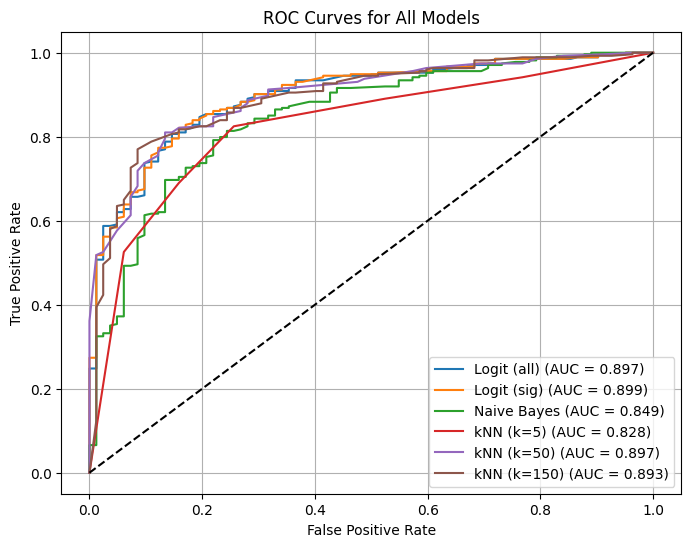

In [61]:
# Logistic Regression (all predictors)
y_pred_prob_logit_all = result_logit_all.predict(sm.add_constant(Test[['LoyalCH', 'SpecialCH', 'PriceDiff']]))

# Logistic Regression (significant predictors)
y_pred_prob_logit_sig = result_logit_sig.predict(sm.add_constant(Test[['LoyalCH', 'PriceDiff']]))

# Naive Bayes
y_pred_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

# kNN models
y_pred_prob_knn5 = knn5.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_knn50 = knn50.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_knn150 = knn150.predict_proba(X_test_scaled)[:, 1]

models = {
    'Logit (all)': y_pred_prob_logit_all,
    'Logit (sig)': y_pred_prob_logit_sig,
    'Naive Bayes': y_pred_prob_nb,
    'kNN (k=5)': y_pred_prob_knn5,
    'kNN (k=50)': y_pred_prob_knn50,
    'kNN (k=150)': y_pred_prob_knn150
}

plt.figure(figsize=(8,6))

for name, y_probs in models.items():
    fpr, tpr, _ = roc_curve(y_test_knn, y_probs)
    auc = roc_auc_score(y_test_knn, y_probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


Question 3

In [62]:
#make array with observations here
data = {
    'Obs': [1,2,3,4,5,6],
    'X1': [1,1,0,5,6,4],
    'X2': [4,3,4,1,2,0]
}

df = pd.DataFrame(data)
df.set_index('Obs', inplace=True)
df



,X1,X2
Obs,,
1,1,4
2,1,3
3,0,4
4,5,1
5,6,2
6,4,0


a.

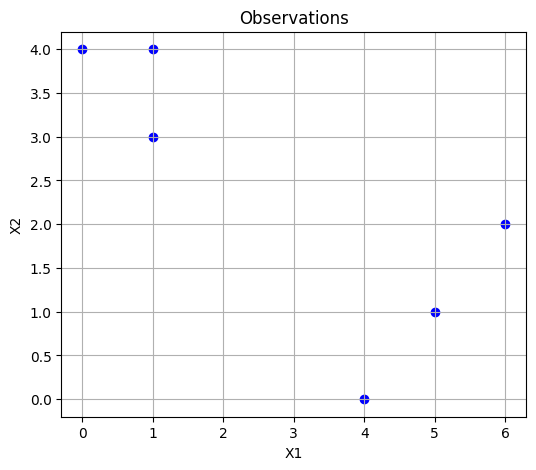

In [63]:
plt.figure(figsize=(6,5))
plt.scatter(df['X1'], df['X2'], color='blue')


plt.title("Observations")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

b.

In [64]:
np.random.seed(1)

df['Cluster'] = np.random.choice([1,2], size=len(df))

df

,X1,X2,Cluster
Obs,,,
1,1,4,2
2,1,3,2
3,0,4,1
4,5,1,1
5,6,2,2
6,4,0,2


In [65]:
# colors = df['Cluster'].map({1: 'steelblue', 2: 'orange'})

# plt.figure(figsize=(6,5))
# plt.scatter(df['X1'], df['X2'], c=colors, s=80)
# for i in df.index:
#     plt.text(df.loc[i, 'X1'] + 0.1, df.loc[i, 'X2'] + 0.1, str(i), fontsize=10)

# plt.title("Random Initial Cluster Assignment (K=2)")
# plt.xlabel("X1")
# plt.ylabel("X2")
# plt.grid(True)
# plt.show()

c.

In [66]:
centroids = df.groupby('Cluster')[['X1', 'X2']].mean()

centroids

,X1,X2
Cluster,,
1,2.5,2.50
2,3.0,2.25


In [67]:
# colors = df['Cluster'].map({1: 'steelblue', 2: 'orange'})

# plt.figure(figsize=(6,5))
# plt.scatter(df['X1'], df['X2'], c=colors, s=80, label='Observations')
# plt.scatter(centroids['X1'], centroids['X2'], c=['steelblue', 'orange'],
#             s=200, marker='X', edgecolors='black', label='Centroids')

# for i in df.index:
#     plt.text(df.loc[i, 'X1'] + 0.1, df.loc[i, 'X2'] + 0.1, str(i), fontsize=10)

# plt.title("Cluster Centroids (After Initial Assignment)")
# plt.xlabel("X1")
# plt.ylabel("X2")
# plt.legend()
# plt.grid(True)
# plt.show()

d.

In [68]:
distances = pd.DataFrame({
    'to_cluster1': np.sqrt((df['X1'] - centroids.loc[1, 'X1'])**2 + (df['X2'] - centroids.loc[1, 'X2'])**2),
    'to_cluster2': np.sqrt((df['X1'] - centroids.loc[2, 'X1'])**2 + (df['X2'] - centroids.loc[2, 'X2'])**2)
})


df['NewCluster'] = np.where(distances['to_cluster1'] < distances['to_cluster2'], 1, 2)


df

,X1,X2,Cluster,NewCluster
Obs,,,,
1,1,4,2,1
2,1,3,2,1
3,0,4,1,1
4,5,1,1,2
5,6,2,2,2
6,4,0,2,2


In [69]:
# colors = df['NewCluster'].map({1: 'steelblue', 2: 'orange'})

# plt.figure(figsize=(6,5))
# plt.scatter(df['X1'], df['X2'], c=colors, s=80)
# plt.scatter(centroids['X1'], centroids['X2'], c=['steelblue', 'orange'],
#             s=200, marker='X', edgecolors='black', label='Centroids')

# for i in df.index:
#     plt.text(df.loc[i, 'X1'] + 0.1, df.loc[i, 'X2'] + 0.1, str(i), fontsize=10)

# plt.title("Updated Cluster Assignments (Iteration 1)")
# plt.xlabel("X1")
# plt.ylabel("X2")
# plt.legend()
# plt.grid(True)
# plt.show()


e.

In [70]:
centroids2 = df.groupby('Cluster')[['X1', 'X2']].mean()

centroids2

,X1,X2
Cluster,,
1,2.5,2.50
2,3.0,2.25


In [71]:
distances2 = pd.DataFrame({
    'to_cluster1': np.sqrt((df['X1'] - centroids2.loc[1, 'X1'])**2 + (df['X2'] - centroids2.loc[1, 'X2'])**2),
    'to_cluster2': np.sqrt((df['X1'] - centroids2.loc[2, 'X1'])**2 + (df['X2'] - centroids2.loc[2, 'X2'])**2)
})


df['NewCluster2'] = np.where(distances2['to_cluster1'] < distances2['to_cluster2'], 1, 2)


df

,X1,X2,Cluster,NewCluster,NewCluster2
Obs,,,,,
1,1,4,2,1,1
2,1,3,2,1,1
3,0,4,1,1,1
4,5,1,1,2,2
5,6,2,2,2,2
6,4,0,2,2,2


Since the clusters did not change, these clusters are the final result.

f.

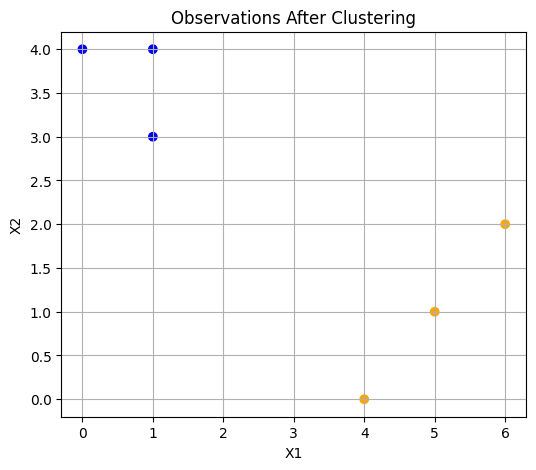

In [72]:
plt.figure(figsize=(6,5))
colors = df['NewCluster2'].map({1:'blue', 2:'orange'})
plt.scatter(df['X1'], df['X2'], color=colors)


plt.title("Observations After Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

Question 4

In [73]:
CEV = pd.read_csv('../data/CEV2021.csv')
CEV

,State,Formal_Volunteering,Organizational_Membership,Charitable_Giving,Voting_Local,Attending_Public_Meetings
0,AL,0.20,0.18,0.40,0.50,0.08
1,AK,0.27,0.26,0.48,0.67,0.14
2,AZ,0.23,0.23,0.49,0.59,0.06
3,AR,0.21,0.23,0.52,0.46,0.07
4,CA,0.18,0.18,0.39,0.58,0.08
5,CO,0.26,0.27,0.56,0.72,0.12
6,CT,0.29,0.22,0.61,0.57,0.10
7,DE,0.30,0.31,0.49,0.40,0.09
8,DC,0.34,0.36,0.61,0.78,0.14
9,FL,0.16,0.18,0.37,0.54,0.07


a.

In [ ]:
# features = ['Formal_Volunteering', 'Organizational_Membership', 'Charitable_Giving', 'Voting_Local', 'Attending_Public_Meetings']
# X = CEV.set_index('State')[features]
# scaler = StandardScaler()
# X_std = scaler.fit_transform(X)

# Z = linkage(X_std, method='complete', metric='euclidean')

# plt.figure(figsize=(12,8))
# dendrogram(Z,labels = X.index.tolist(), orientation='top', leaf_rotation=90, leaf_font_size=10)
# plt.title("Hierarchical Clustering Dendrogram")
# plt.xlabel("State")
# plt.ylabel("Distance")
# plt.tight_layout()
# plt.show()



In [90]:
features = ['Formal_Volunteering', 'Organizational_Membership', 'Charitable_Giving', 'Voting_Local', 'Attending_Public_Meetings']
X = CEV.set_index('State')[features]
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(X_scale)

,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'complete'
,distance_threshold,0
,compute_distances,False


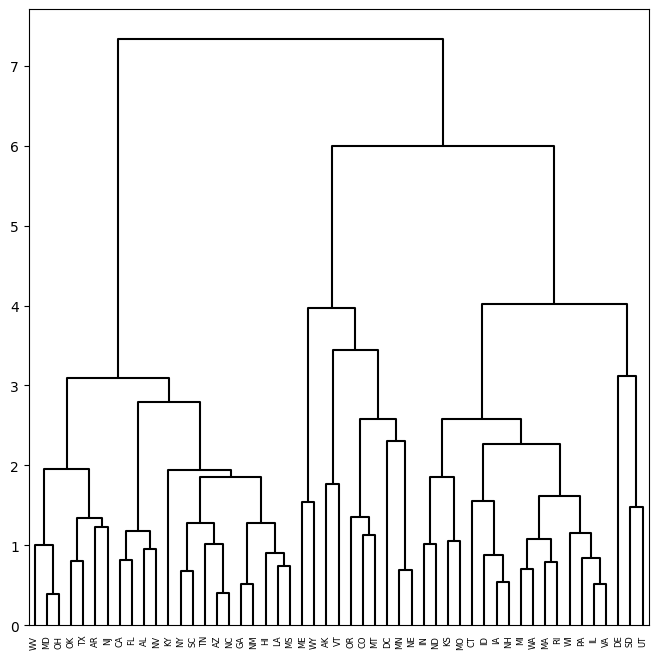

In [108]:
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           leaf_rotation=90,
           labels=X.index,
           color_threshold=0,
           above_threshold_color='black');

b.

In [115]:
cut_tree(linkage_comp, n_clusters=3).T

array([[0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2,
        2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0,
        2, 1, 2, 2, 0, 2, 1]])

In [116]:
X['cluster']=cut_tree(linkage_comp, n_clusters=3)
X.sort_values('cluster')

,Formal_Volunteering,Organizational_Membership,Charitable_Giving,Voting_Local,Attending_Public_Meetings,cluster,State
State,,,,,,,
AL,0.20,0.18,0.40,0.50,0.08,0,AL
AZ,0.23,0.23,0.49,0.59,0.06,0,AZ
AR,0.21,0.23,0.52,0.46,0.07,0,AR
CA,0.18,0.18,0.39,0.58,0.08,0,CA
GA,0.20,0.22,0.46,0.55,0.08,0,GA
HI,0.20,0.23,0.45,0.59,0.07,0,HI
FL,0.16,0.18,0.37,0.54,0.07,0,FL
KY,0.23,0.20,0.45,0.66,0.06,0,KY
MS,0.21,0.21,0.41,0.60,0.08,0,MS


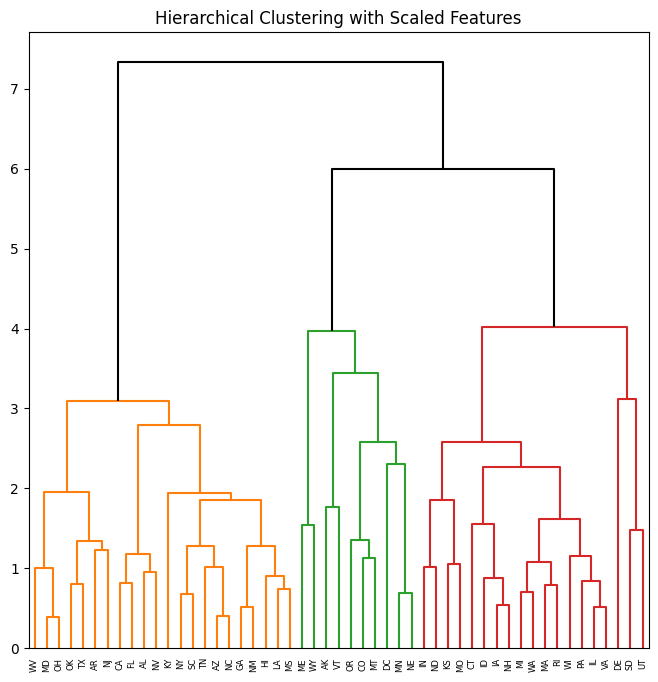

In [119]:
hc_comp_scale = HClust(distance_threshold=0,
                       n_clusters=None,
                       linkage='complete').fit(X_scale)
linkage_comp_scale = compute_linkage(hc_comp_scale)
color_thresh = 5
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scale, ax=ax, 
           leaf_rotation=90, labels=X.index,
           color_threshold=color_thresh, above_threshold_color='black')
ax.set_title("Hierarchical Clustering with Scaled Features");

In [120]:
X = X.copy() 
X['State'] = X.index

for cluster in X['cluster'].unique():
    print(f"Cluster {cluster} states:")
    print(X.loc[X['cluster'] == cluster, 'State'].tolist())
    print()  # blank line for readability



Cluster 0 states:
['AL', 'AZ', 'AR', 'CA', 'FL', 'GA', 'HI', 'KY', 'LA', 'MD', 'MS', 'NV', 'NJ', 'NM', 'NY', 'NC', 'OH', 'OK', 'SC', 'TN', 'TX', 'WV']

Cluster 1 states:
['AK', 'CO', 'DC', 'ME', 'MN', 'MT', 'NE', 'OR', 'VT', 'WY']

Cluster 2 states:
['CT', 'DE', 'ID', 'IL', 'IN', 'IA', 'KS', 'MA', 'MI', 'MO', 'NH', 'ND', 'PA', 'RI', 'SD', 'UT', 'VA', 'WA', 'WI']



c.

In [112]:
cut_tree(linkage_comp, n_clusters=4).T

array([[0, 1, 0, 0, 0, 1, 2, 3, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2,
        2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 3, 0, 0,
        3, 1, 2, 2, 0, 2, 1]])

In [113]:
X['cluster']=cut_tree(linkage_comp, n_clusters=4)
X.sort_values('cluster')

,Formal_Volunteering,Organizational_Membership,Charitable_Giving,Voting_Local,Attending_Public_Meetings,cluster,State
State,,,,,,,
AL,0.20,0.18,0.40,0.50,0.08,0,AL
AZ,0.23,0.23,0.49,0.59,0.06,0,AZ
AR,0.21,0.23,0.52,0.46,0.07,0,AR
CA,0.18,0.18,0.39,0.58,0.08,0,CA
GA,0.20,0.22,0.46,0.55,0.08,0,GA
HI,0.20,0.23,0.45,0.59,0.07,0,HI
FL,0.16,0.18,0.37,0.54,0.07,0,FL
KY,0.23,0.20,0.45,0.66,0.06,0,KY
MS,0.21,0.21,0.41,0.60,0.08,0,MS


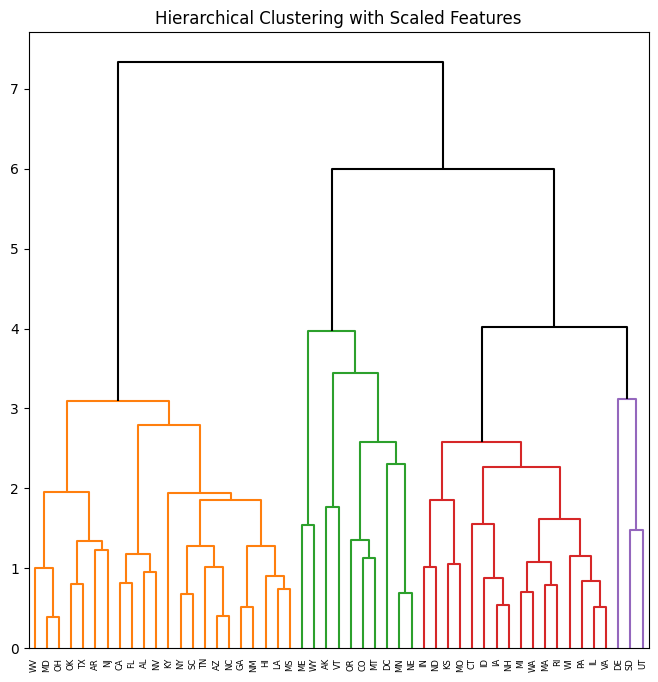

In [123]:
hc_comp_scale = HClust(distance_threshold=0,
                       n_clusters=None,
                       linkage='complete').fit(X_scale)
linkage_comp_scale = compute_linkage(hc_comp_scale)
color_thresh = 4
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scale, ax=ax, 
           leaf_rotation=90, labels=X.index,
           color_threshold=color_thresh, above_threshold_color='black')
ax.set_title("Hierarchical Clustering with Scaled Features");